# 1. Define problem statements
 Do this at the end

# 2. Import dataset & Get general information 
A weather dataset of Cluj Napoca was scraped from the Open Weather Map's History API. The data was collected from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf

In [607]:
# Load the dataset from Hugging Face and display the first few rows:
from datasets import load_dataset
dataset = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
import pandas as pd
df = pd.DataFrame(dataset['train'])
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n


In [608]:
# Assign descriptions to corresponding attributes:
parameter_descriptions = {
    'dt': 'Time of data calculation, unix, UTC',
    'dt_iso': 'Date and time in UTC format',
    'timezone': 'Shift in seconds from UTC',
    'city_name': 'City name',
    'lat': 'Geographical coordinates of the location (latitude)',
    'lon': 'Geographical coordinates of the location (longitude)',
    'temp': 'Temperature',
    'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
    'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
    'feels_like': 'This temperature parameter accounts for the human perception of weather',
    'temp_min': 'Minimum temperature at the moment (optional)',
    'temp_max': 'Maximum temperature at the moment (optional)',
    'pressure': 'Atmospheric pressure (on the sea level), hPa',
    'sea_level': 'Sea level',
    'grnd_level': 'Ground level',
    'humidity': 'Humidity, %',
    'wind_speed': 'Wind speed',
    'wind_deg': 'Wind direction, degrees (meteorological)',
    'wind_gust': 'Wind gust',
    'rain_1h': 'Rain volume for the last hour, mm',
    'rain_3h': 'Rain volume for the last 3 hours, mm',
    'snow_1h': 'Snow volume for the last hour, mm (in liquid state)',
    'snow_3h': 'Snow volume for the last 3 hours, mm (in liquid state)',
    'clouds_all': 'Cloudiness, %',
    'weather_id': 'Weather condition id',
    'weather_main': 'Group of weather parameters (Rain, Snow, Extreme etc.)',
    'weather_description': 'Weather condition within the group',
    'weather_icon': 'Weather icon id'
}
parameter_descriptions

{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'Atmospheric pressure (on the sea level), hPa',
 'sea_level': 'Sea level',
 'g

In [609]:
# Check the total number of rows and columns:
df.shape

(139394, 28)

In [610]:
# Display the data types and count non-null values in each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       object 
 14  grnd_level           0 non-null       object 
 15  humidity         

In [611]:
# View general statistics figure of numerical data:
df.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393940e+05,139394.000000,1.393940e+05,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,139394.000000,...,139394.000000,139394.000000,139394.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139394.000000,139394.000000
mean,1.440551e+09,9251.649282,4.676714e+01,2.359214e+01,9.618191,8693.875169,5.084661,8.529267,8.327400,12.116846,...,75.657396,2.390518,154.977940,5.031590,0.605345,1.859643,0.361105,0.908526,38.215605,728.715253
std,1.396620e+08,1782.328653,8.589071e-11,4.349603e-11,47.385004,2743.282608,7.568612,47.556514,47.396329,9.727896,...,19.817223,26.828828,117.502033,3.494126,0.876458,3.033603,0.300892,1.108691,38.417129,121.070155
min,1.199146e+09,7200.000000,4.676714e+01,2.359214e+01,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319538e+09,7200.000000,4.676714e+01,2.359214e+01,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,...,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440347e+09,10800.000000,4.676714e+01,2.359214e+01,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,...,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561060e+09,10800.000000,4.676714e+01,2.359214e+01,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,...,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,10800.000000,4.676714e+01,2.359214e+01,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,...,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


As observed, there are 139394 rows and 28 columns in total. No data on sea level and ground level have been recorded (0 non-null values are detected in 'sea_level' and 'grnd_level' columns). 

# 3. Data cleaning and preparation


## 3.1. Create a copy of the initial dataset, check for duplicates


We will now introduce the 'cleaned_df' dataframe, which stores the results after each cleaning step. The 'copy()' function specifies that this is a new and separate dataframe, not just a reference to the original one.

In [616]:
cleaned_df = df.copy()

In [617]:
# Check duplication
cleaned_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
139389    False
139390    False
139391    False
139392    False
139393    False
Length: 139394, dtype: bool

There are no exact duplicated records.

In [619]:
# Check if there are multiple records with the same timestamp and location
cleaned_df[cleaned_df.duplicated(subset=['dt','dt_iso', 'timezone', 'city_name', 'lat', 'lon'])]

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
18,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,600,Snow,light snow,13n
20,1199210400,2008-01-01 18:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.69,4000.0,-5.41,-4.69,...,NaN,NaN,NaN,0.23,NaN,100,600,Snow,light snow,13n
22,1199214000,2008-01-01 19:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.42,4000.0,-5.14,-4.42,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
24,1199217600,2008-01-01 20:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-4.15,2000.0,-4.75,-4.15,...,NaN,NaN,NaN,0.30,NaN,100,600,Snow,light snow,13n
26,1199221200,2008-01-01 21:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-3.87,2000.0,-4.47,-3.87,...,NaN,NaN,NaN,NaN,1.0,100,600,Snow,light snow,13n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138774,1680768000,2023-04-06 08:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-0.11,2000.0,-1.93,-5.13,...,NaN,NaN,NaN,0.65,NaN,100,701,Mist,mist,50d
138776,1680771600,2023-04-06 09:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.34,5000.0,-2.39,-4.27,...,NaN,NaN,NaN,0.60,NaN,100,701,Mist,mist,50d
138778,1680775200,2023-04-06 10:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.59,5000.0,-1.30,-4.61,...,NaN,NaN,NaN,0.59,NaN,100,701,Mist,mist,50d
138782,1680786000,2023-04-06 13:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,0.68,5000.0,-2.09,-4.49,...,NaN,NaN,NaN,0.30,NaN,100,701,Mist,mist,50d


Within specific time and location subsets, there are 4,994 duplicate instances — meaning multiple records exist for the same location at the exact same timestamp. This can occur due to data being collected from multiple sources or sensors, variations between forecasted and observed data, or delays and overlaps, which may result from changes in timezone during summer and winter, in data reporting and aggregation. 

It is not possible to conclude which record might be the accurate data. Hence, we will keep this for further analysis at this moment.

In [621]:
# Show an example of records with the same timestamp and location
cleaned_df.query('dt==1199206800')

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
17,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,701,Mist,mist,50n
18,1199206800,2008-01-01 17:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-5.21,4000.0,-5.93,-5.21,...,NaN,NaN,NaN,0.15,NaN,100,600,Snow,light snow,13n


## 3.2. Reformat time data and extract time features
The date time is currently in an 'object' type. We will convert this into date time format for easier manipulations.

In [623]:
# Parse datetime 
cleaned_df['dt_iso'] = pd.to_datetime(cleaned_df['dt_iso'].str.replace(' +0000 UTC', '', regex=False))

In [624]:
# Extract time features 
cleaned_df['hour'] = cleaned_df['dt_iso'].dt.hour
cleaned_df['day'] = cleaned_df['dt_iso'].dt.day
cleaned_df['month'] = cleaned_df['dt_iso'].dt.month
cleaned_df['year'] = cleaned_df['dt_iso'].dt.year
cleaned_df['weekday'] = cleaned_df['dt_iso'].dt.weekday

# Show first few rows with new features 'hour', 'day', 'month', 'year', 'weekday'
cleaned_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,100,701,Mist,mist,50n,4,1,1,2008,1


## 3.3. Drop attributes 


### 3.3.1. Drop location attributes 'city_name', 'lat', 'lon' 

In [627]:
# Check unique values in 'city_name', 'lat', 'lon'
for i in cleaned_df.columns[3:6]:
    print(f'Unique values of {i} are {pd.unique(cleaned_df[i])}')

Unique values of city_name are ['Universitatea Babeș-Bolyai din Cluj-Napoca']
Unique values of lat are [46.767141]
Unique values of lon are [23.592139]


The output displays only one value in each column, referring to the same location. This data is not necessary and useful to our models, so these 3 columns will be dropped.

In [629]:
# Drop 'city_names', 'lat', 'lon' columns and show first few rows
cleaned_df = cleaned_df.drop(['city_name', 'lat', 'lon'], axis = 1)
cleaned_df.head()

,dt,dt_iso,timezone,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00,7200,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00,7200,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00,7200,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00,7200,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00,7200,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,100,701,Mist,mist,50n,4,1,1,2008,1


### 3.3.2. Drop time attributes 'dt', 'dt_iso', 'timezone'

Since we have already extracted the necessary time features (in section 4.2) for our further analysis, we decide to overlook the other time features, which are 'dt', 'dt_iso', and 'timezone'.


In [632]:
# Drop 'dt', 'dt_iso', 'timezone' columns and show first few rows
cleaned_df = cleaned_df.drop(['dt', 'dt_iso', 'timezone'], axis = 1)
cleaned_df.head()

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,None,None,92,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,None,None,92,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,None,None,92,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,None,None,92,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,None,None,93,...,100,701,Mist,mist,50n,4,1,1,2008,1


### 3.3.3. Drop other attributes

By checking the number of non-null values in each column previously, we observe that no non-null data was detected in 'sea_level' and 'grnd_level'. For this reason, we decide to drop 'sea_level' and 'grnd_level' attributes as they contain no accessible data. 

In [635]:
# Drop 'sea_level' and 'grnd_level' columns and show first few rows
cleaned_df = cleaned_df.drop(['sea_level', 'grnd_level'], axis=1)
cleaned_df.head()

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,1.0,110,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,1.0,50,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,1.0,140,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,1.0,230,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,1.0,290,...,100,701,Mist,mist,50n,4,1,1,2008,1


## 3.4. Define valid ranges and remove outliers 
According to real data, −89.2°C is the coldest point ever recorded on Earth, i.e., in Antarctica, and 56.7°C is the hottest point recorded on Earth, specifically in Death Valley, USA. The valid domain for the 'temp', 'feels_like', 'temp_min', 'temp_max', 'dew_point' attributes is thus (-90, 60) (Celsius degrees). 
The valid range for 'pressure', on the other hand, is (870 – 1085) (hPa).

By filtering data within valid ranges, we simultaneously remove the most obvious outliers. 

In [603]:
# Define realistic value ranges for filtering
valid_ranges = {
    'temp': (-90, 60),
    'feels_like': (-90, 60),
    'temp_min': (-90, 60),
    'temp_max': (-90, 60),
    'dew_point': (-90, 60),
    'pressure': (870, 1085),
}

# Filter rows based on valid ranges and show output
mask = pd.Series(True, index=cleaned_df.index)
for col, (low, high) in valid_ranges.items():
    if col in cleaned_df.columns:
        mask &= cleaned_df[col].between(low, high)
cleaned_df = cleaned_df[mask]
cleaned_df

,dt,dt_iso,timezone,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,clouds_all,weather_id,weather_main,weather_description,weather_icon,hour,day,month,year,weekday
0,1199145600,2008-01-01 00:00:00,7200,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,100,600,Snow,light snow,13n,0,1,1,2008,1
1,1199149200,2008-01-01 01:00:00,7200,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,100,600,Snow,light snow,13n,1,1,1,2008,1
2,1199152800,2008-01-01 02:00:00,7200,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,100,600,Snow,light snow,13n,2,1,1,2008,1
3,1199156400,2008-01-01 03:00:00,7200,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,100,804,Clouds,overcast clouds,04n,3,1,1,2008,1
4,1199160000,2008-01-01 04:00:00,7200,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,100,701,Mist,mist,50n,4,1,1,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00,10800,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,0,800,Clear,sky is clear,01n,19,1,5,2023,0
139390,1682971200,2023-05-01 20:00:00,10800,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,0,800,Clear,sky is clear,01n,20,1,5,2023,0
139391,1682974800,2023-05-01 21:00:00,10800,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,0,800,Clear,sky is clear,01n,21,1,5,2023,0
139392,1682978400,2023-05-01 22:00:00,10800,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,0,800,Clear,sky is clear,01n,22,1,5,2023,0


## 3.5. Check for missing data

In [494]:
# Check the number of missing values in each column
cleaned_df.isna().sum()

temp                        0
visibility               1893
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              128476
rain_1h                120364
rain_3h                137544
snow_1h                134819
snow_3h                138570
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
hour                        0
day                         0
month                       0
year                        0
weekday                     0
dtype: int64

Missing data are located in 'visibility', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', and 'snow_3h'. However, the number of missing data in each column is so large that we keep these null values in the dataset at this point. We will determine how to deal with them in the next step where we build and run models. 

## 3.6. Summary 
Here are the changes that we have made to the initial dataset so far:
- 'dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level' columns are dropped. 
- Time data are reformatted, and time features are extracted. New columns 'hour', 'day', 'month', 'year', 'weekday' emerge in the dataset.
- Outliers within 'temp', 'feels-like', 'temp_max', 'temp_min', 'dew_point', and 'pressure' are detected and removed.
- Null data in 'sea_level' and 'grnd_level' are removed together with their respective columns. Those in 'visibility', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', and 'snow_3h' remain in the cleaned dataset; however, they will be treated differently in the model running section.

# 4. Visualize and understand data


In this section, we visualize 'temp', 'feels_like, 'temp_max', 'temp_min', 'humidity', 'pressure', and 'weather_main' data to grasp the city's general climate pattern and trend throughout the years. 
We visualize data from 2008 to 2022 because the data collected in 2023 is incomplete with only the first four months being recorded.

In [685]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data from 2008 to 2022
cleaned_df_filtered = cleaned_df[(cleaned_df['year'] >= 2008) & (cleaned_df['year'] <= 2022)]

## 4.1. 'Temp', 'feels_like', 'temp_max', 'temp_min'

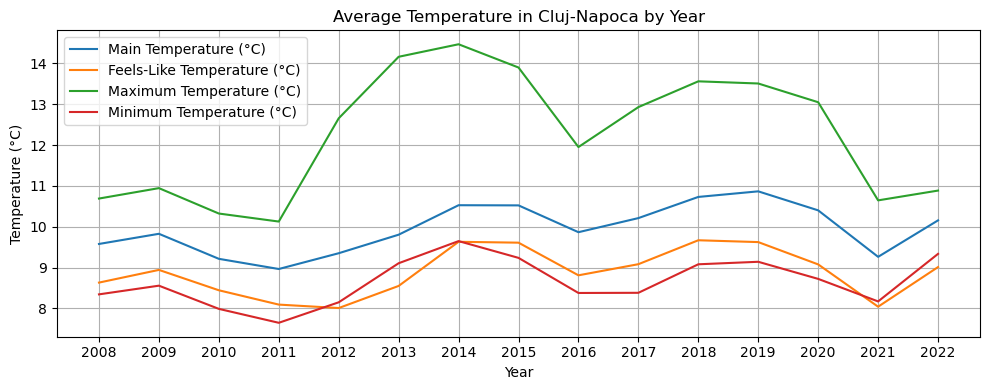

In [687]:
# Group by year and calculate average temperature
avg_temp = cleaned_df_filtered.groupby('year')[['temp', 'feels_like', 'temp_min', 'temp_max']].mean().reset_index()

# Plot data with a line graph
plt.figure(figsize=(10, 4))
plt.plot(avg_temp['year'], avg_temp['temp'], label='Main Temperature (°C)')
plt.plot(avg_temp['year'], avg_temp['feels_like'], label='Feels-Like Temperature (°C)')
plt.plot(avg_temp['year'], avg_temp['temp_max'], label='Maximum Temperature (°C)')
plt.plot(avg_temp['year'], avg_temp['temp_min'], label='Minimum Temperature (°C)')
plt.title('Average Temperature in Cluj-Napoca by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks= avg_temp['year'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

All the four variables follow similar patterns of fluctuation, strong correlations can be visually observed from the graph.

We notice a generally upward trend in the city's temperature. Given the rise in main temperature over the years, this change serves as a typical instance of global warming.

The gap between main temperature and feels-like temperature is stably low (< 2°C), which means the other weather paramenters (e.g. wind, humidity, etc.) have little influence in how temperature is felt by our body.   

Both the maximum and minimum temperatures have increased throughout the years, indicating a warming period. The difference between maximum and minimum temperatures constantly stays below 5°C, showing that the temperature variation of the city is not large and severe.

## 4.2. 'Humidity' and 'pressure'

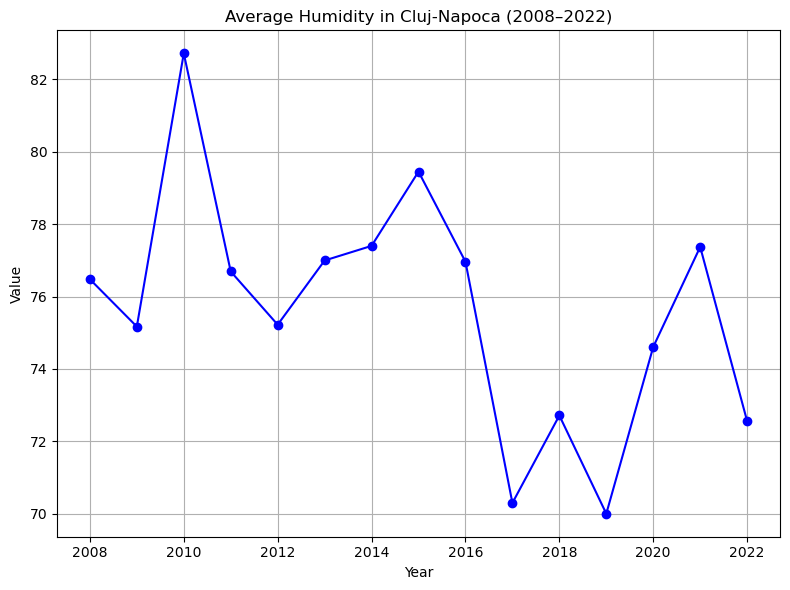

In [691]:
# Group by year and calculate average humidity 
yearly_avg = cleaned_df_filtered.groupby('year')['humidity'].mean().reset_index()

# Plot data
plt.figure(figsize=(8, 6))
plt.plot(yearly_avg['year'], yearly_avg['humidity'], label='Average Humidity (%)', color='blue', marker='o')
plt.title('Average Humidity in Cluj-Napoca (2008–2022)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Overall, the city has a consistently high level of humidity, exceeding 70%, with a downward trend. Since 30-50% is considered the optimal range for people with respiratory problems, especially those with asthma, Cluj-Napoca's high humidity can be particularly harmful for these patients as it traps allergens (dust mites, mold spores) in the air, increases inflammation in airways and mucus production, and can trigger asthma attacks...

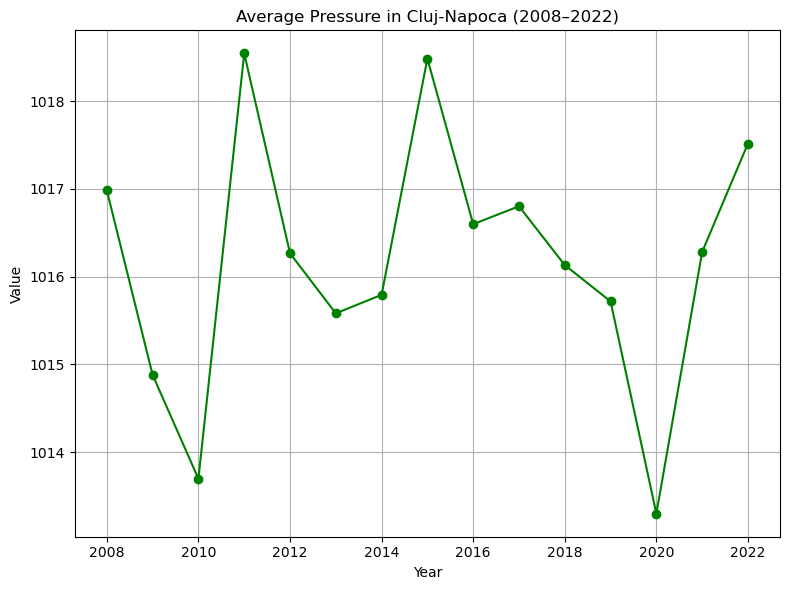

In [693]:
# Group by year and calculate average pressure 
yearly_avg = cleaned_df_filtered.groupby('year')['pressure'].mean().reset_index()

# Plot data
plt.figure(figsize=(8, 6))
plt.plot(yearly_avg['year'], yearly_avg['pressure'], label='Average Pressure (hPa)', color='green', marker='o')
plt.title('Average Pressure in Cluj-Napoca (2008–2022)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

The average pressure values mostly range between 1013 hPa and 1019 hPa. This range is within what’s considered normal sea-level atmospheric pressure and is generally well-tolerated by most people.

# 4.3. 'Weather_main'


In [578]:
# View unique values of 'weather_main'
unique_conditions = cleaned_df['weather_main'].unique()
print("Unique weather_main values:", unique_conditions)

Unique weather_main values: ['Snow' 'Clouds' 'Mist' 'Fog' 'Clear' 'Rain' 'Drizzle' 'Thunderstorm'
 'Smoke' 'Haze' 'Squall' 'Dust']


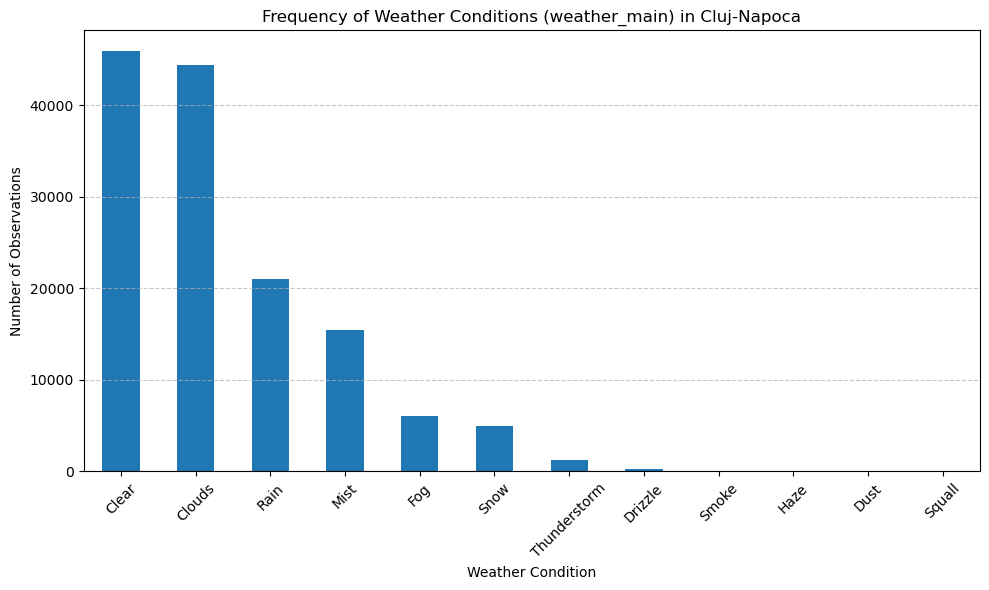

In [586]:
# Count occurrences of each unique condition
weather_counts = cleaned_df['weather_main'].value_counts()

# Visualize 
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar')
plt.title('Frequency of Weather Conditions (weather_main) in Cluj-Napoca')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Clear and Clouds are by far the dominant weather conditions, meaning that stable or fair meaning stable or fair weather is common in Cluj-Napoca. This suggests temperate climate conditions for much of the year.

As for precipitation events, rain is the most frequent form of precipitation, occurring far more frequently than snow or drizzle. Mist and fog are also fairly common, indicating likely humid mornings. Snow occurs with moderate frequency — consistent with a continental climate with cold winters.

Thunderstorm occurs much less often, meaning violent weather is relatively rare.
Drizzle, Smoke, Haze, Dust, and Squall are very rare or almost negligible, suggesting that the air quality and weather extremes are generally stable and safe in the city.

## 4.4. Feature Relationships

To gain initial overview of the relationship between each pair of numerical features, we generate a the correlation heatmap using Seaborn’s built-in function.

In [656]:
# Get an overview of the cleaned data
cleaned_df.columns
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 139394 non-null  float64
 1   visibility           137498 non-null  float64
 2   dew_point            139391 non-null  float64
 3   feels_like           139394 non-null  float64
 4   temp_min             139394 non-null  float64
 5   temp_max             139394 non-null  float64
 6   pressure             139394 non-null  int64  
 7   humidity             139394 non-null  int64  
 8   wind_speed           139394 non-null  float64
 9   wind_deg             139394 non-null  int64  
 10  wind_gust            10915 non-null   float64
 11  rain_1h              19027 non-null   float64
 12  rain_3h              1847 non-null    float64
 13  snow_1h              4572 non-null    float64
 14  snow_3h              821 non-null     float64
 15  clouds_all       

<Axes: >

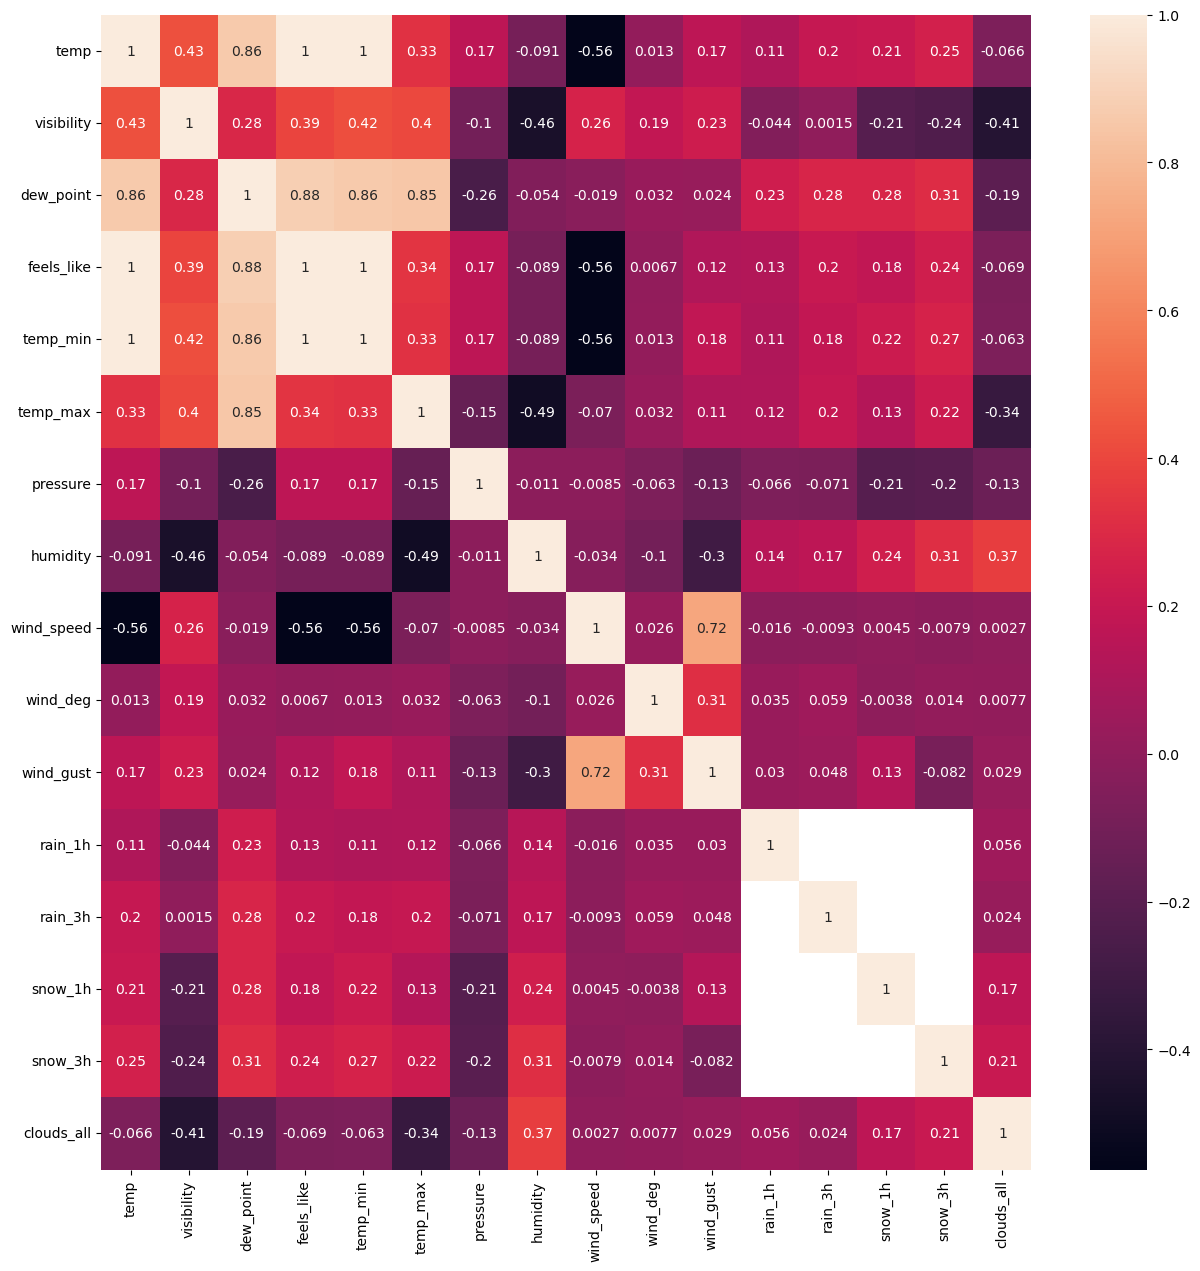

In [663]:
# Create a correlation matrix
df_corr = cleaned_df[['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
                      'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
                      'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all'
                      ]].corr()
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot = True)

## 4.5. Summary
Cluj-Napoca has a typical temperate climate. Although the main temperature remains mostly stable with a low degree of variation, the city has experienced a slight warming trend over the years.  The most dominant weather conditions are clear and cloudy skies with rare occurrences of extreme events. The city has a significantly high level of humidity, which poses potential risks for those with severe respiratory problems. Such patients should avoid outdoor activity during hot, humid days; monitor asthma symptoms closely on days above 75% humidity; and ensure mold control in homes and workplaces.

Different features in the dataset can be predicted based on the others. Some obvious correlations can be drawn from the aforementioned matrix. Models will be formulated and run in the coming section.